<a href="https://colab.research.google.com/github/alimehdi4236/PFG/blob/main/Sixth_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow the article: **Step-by-Step Guide: Text Classification with 20 Newsgroups Dataset**

 https://medium.com/@alexrodriguesj/step-by-step-guide-text-classification-with-20-newsgroups-dataset-ecf31562afd9

We will walk through the process of building a text classification model using the [20 Newsgroups dataset](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset). This dataset is a classic benchmark for text classification and is widely used to test machine learning algorithms.

What is text classification?

Text classification is the process of assigning predefined categories to text documents. It is a common task in natural language processing (NLP) and has many applications, such as spam detection, sentiment analysis, and topic labeling.

We will use the 20 Newsgroups dataset, which contains approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. The dataset is available in the sklearn.datasets module of Scikit-learn.

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Step 1: Install Required Libraries
First, we need to install the necessary libraries:

In [ ]:
!pip install pandas scikit-learn nltk matplotlib seaborn

# Step 2: Import Libraries

**pandas**: a powerful data manipulation and analysis library for Python

**sklearn.model_selection.train_test_split**: A utility function from Scikit-learn that splits arrays or matrices into random train and test subsets.

**sklearn.feature_extraction.text.TfidfVectorizer**: A module from Scikit-learn used to convert a collection of raw documents to a matrix of TF-IDF features. This transformation is essential for preparing text data for machine learning algorithms.

**sklearn.linear_model.LogisticRegression**: This is an implementation of logistic regression in Scikit-learn, a popular algorithm for binary classification tasks.

**sklearn.metrics.accuracy_score, classification_report, confusion_matrix**: These are evaluation metrics from Scikit-learn.

**nltk**: Natural Language Toolkit (nltk) is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English.

**nltk.corpus.stopwords**: Part of the NLTK library, this module provides a list of common stopwords (like “the”, “is”, “in”, etc.) for various languages. These are typically removed in text processing tasks to reduce noise.

**re**: The regular expressions library in Python, which provides a way to search for and manipulate strings based on patterns. It is often used for text preprocessing tasks such as tokenization or cleaning text data.

**matplotlib.pyplot**: A plotting library used for creating static, animated, and interactive visualizations in Python. pyplot is a state-based interface to Matplotlib that provides a MATLAB-like interface for creating plots and charts.

**seaborn**: A data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, making it easier to create complex visualizations with less code.


In [1]:
# Import libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer
)


# Step 3: Load the Dataset

We load the 20 Newsgroups dataset using the fetch_20newsgroups function from Scikit-learn.

In [2]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Step 4: Text Preprocessing

Text preprocessing is a crucial step in any text classification task. It involves cleaning and transforming the raw text into a format that can be used by machine learning models.

Here’s a function to preprocess the text:

In [4]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    stop_words = set(stopwords.words('english')) # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words] # Join tokens back to a single string
    return ' '.join(tokens)

**Lowercasing**: Converts all text to lowercase to maintain uniformity.

**Remove Special Characters and Numbers**: Cleans the text by removing unwanted characters and numbers.

**Stop Words**: Common words (like “and”, “the”) that do not contribute much to the meaning and are removed to reduce noise.

In [5]:
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'][0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [6]:
# Apply preprocessing
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'] = newsgroups_data['text'].apply(preprocess_text)

In [7]:
newsgroups_data['text'][0]

'mamatha devineni ratnam mrandrewcmuedu subject pens fans reactions organization post office carnegie mellon pittsburgh pa lines nntppostinghost poandrewcmuedu sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved however going put end nonpittsburghers relief bit praise pens man killing devils worse thought jagr showed much better regular season stats also lot fo fun watch playoffs bowman let jagr lot fun next couple games since pens going beat pulp jersey anyway disappointed see islanders lose final regular season game pens rule'

Text(0.5, 1.0, 'Top30 Words used in news group : talk.politics.misc')

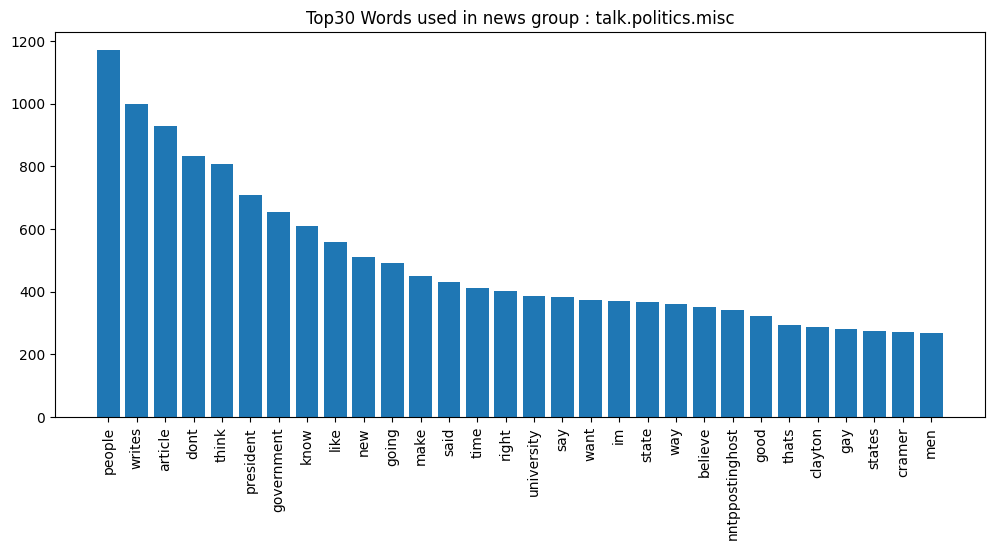

In [8]:
# find top 20 words in Newsgroup by roup_id 0-19
Group_id=18
train_neg_df = newsgroups_data[newsgroups_data['target'] == Group_id]

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_df=0.8 ,min_df=100)
bag_of_words = count_vectorizer.fit_transform(train_neg_df['text'])
sum_words = bag_of_words.sum(axis=0)

words_freq = [
    (word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()
]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

x, y = zip(*words_freq[:30])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Top30 Words used in news group : ' + newsgroups.target_names[Group_id])

# Step 5: Split Data into Train and Test Sets

We split the dataset into training and testing sets.

In [9]:
#The RAND variable is your student ID numbers RAND="bcde"
RAND = 3524

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(newsgroups_data['text'], newsgroups_data['target'], test_size=0.2, stratify=newsgroups_data['target'] , random_state=RAND)

## Step 5.1: Convert text by CountVectorizer and do classification

In [11]:
#vect = CountVectorizer().fit(X_train)
vect = CountVectorizer(binary=False, max_df=0.80, min_df=10, max_features=10000, stop_words="english").fit(X_train)

X_train_cv = vect.transform(X_train)
X_test_cv = vect.transform(X_test)
print("X_train:\n{}".format(repr(X_train_cv)))

X_train:
<15076x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1123489 stored elements in Compressed Sparse Row format>


In [12]:
print("Vocabulary: ", vect.vocabulary_)

Vocabulary:  {'pete': 6579, 'challenge': 1434, 'microsoft': 5610, 'supporters': 8725, 'cellular': 1405, 'mike': 5622, 'fischer': 3399, 'writes': 9877, 'youre': 9977, 'missing': 5673, 'main': 5348, 'point': 6735, 'capitalism': 1304, 'place': 6679, 'competition': 1782, 'yes': 9963, 'concerned': 1836, 'capitalist': 1305, 'software': 8319, 'mind': 5638, 'wrote': 9882, 'grand': 3814, 'ec': 2837, 'technology': 8889, 'kevin': 4871, 'stolen': 8571, 'california': 1258, 'institute': 4514, 'pasadena': 6451, 'distribution': 2648, 'usa': 9413, 'nntppostinghost': 6013, 'summary': 8700, 'pm': 6727, 'blue': 999, 'white': 9748, 'honda': 4164, 'plate': 6699, 'kg': 4880, 'cbr': 1382, 'serial': 8038, 'number': 6089, 'engine': 2986, 'turn': 9277, 'signals': 8174, 'mirrors': 5665, 'lights': 5153, 'track': 9143, 'riders': 7617, 'session': 8052, 'springs': 8464, 'tomorrow': 9094, 'guess': 3881, 'ill': 4305, 'miss': 5669, 'help': 4057, 'baby': 730, 'soundblaster': 8364, 'irq': 4651, 'port': 6774, 'settings': 8

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_model = MultinomialNB()
nb_model.fit(X_train_cv, y_train)
y_pred = nb_model.predict(X_test_cv)
scores_nb=accuracy_score(y_test,y_pred)
print("Base line accuracy = ", scores_nb)

Base line accuracy =  0.8663129973474801


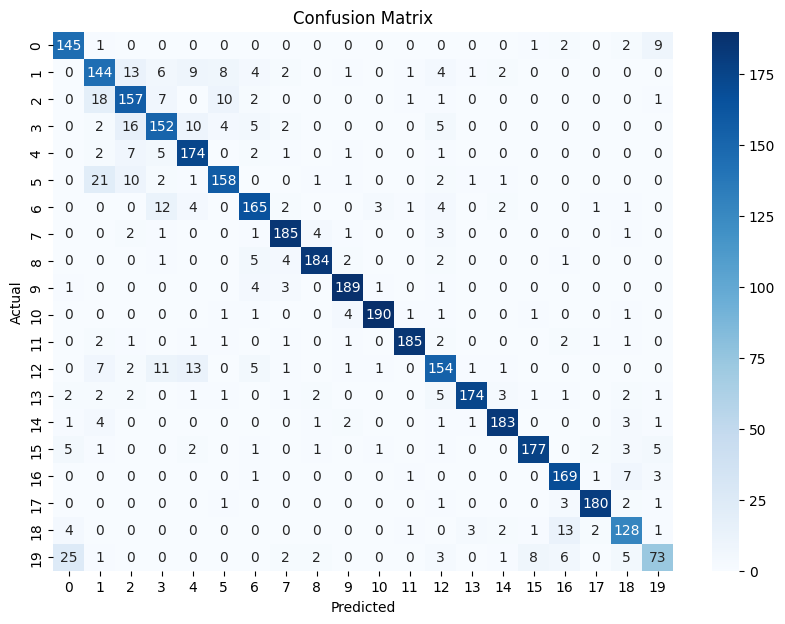

In [14]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**The task 1.**
Depending on the last digit of your student Internal code (abcde) build an "optimal" (i.e. better that the base line) classifier by variating specific *parameter*. Plot the accuracy cure depending on manipulated variable.
The RAND variable is your student ID numbers RAND="bcde".

0. DecisionTreeClassifier(criterion='entropy', random_state=RAND)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND)
2. KNeighborsClassifier(n_neighbors=`\?/`, p=2)
3. KNeighborsClassifier(n_neighbors=`\?/`, p=1)
4. svm. SVC(random_state=RAND, kernel='linear' , max_iter = 1000, tol = 0.01)
5. svm.SVC(random_state=RAND, kernel='rbf', max_iter = 1000, tol = 0.01)
6. svm.SVC(random_state=RAND,kernel='poly', max_iter = 1000, tol = 0.01)
7. svm.LinearSVC(random_state=RAND, max_iter = 1000, tol = 0.01)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`\?/`,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`\?/`,`\?/`), random_state=RAND)

In [15]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model = svm.SVC(kernel='linear', C=.1, max_iter=1000, random_state=RAND)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv)
scores_vect=accuracy_score(y_test,y_pred)
print("Vect-data classifier accuracy = ", scores_vect)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Vect-data classifier accuracy =  0.8543766578249337


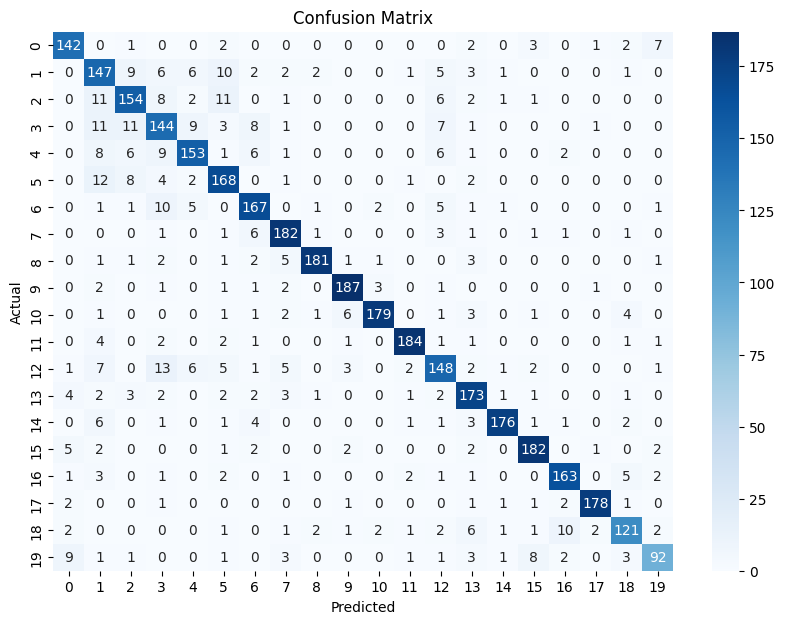

In [16]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step x: Test with some new text
The function `predict_new_text` is designed to preprocess a new piece of text, vectorize it using the trained TF-IDF vectorizer, and predict its category using the trained logistic regression model.

In [17]:
# Function to predict new text
def predict_new_text(model, vectorizer, text):

    text_processed = preprocess_text(text) # Preprocess the text

    text_vectorized = vectorizer.transform([text_processed]) # Vectorize the text

    prediction = model.predict(text_vectorized) # Predict the category

    category_name = newsgroups.target_names[prediction[0]] # Get the category name

    return category_name

# Test texts

In [18]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "in the new zone NASA discovers habitable exoplanet.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church."
]

for text in test_texts:
    predicted_category = predict_new_text(model, vect, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

Test Text: "NASA discovers new exoplanet in the habitable zone."
Predicted Category: "rec.autos"

Test Text: "in the new zone NASA discovers habitable exoplanet."
Predicted Category: "rec.autos"

Test Text: "The car race yesterday was amazing."
Predicted Category: "rec.autos"

Test Text: "Python is a versatile programming language for data science."
Predicted Category: "sci.med"

Test Text: "Pope Francis is the Pope and head of the Catholic Church."
Predicted Category: "soc.religion.christian"



# Lets build LogisticRegressor on Count Vectorized text data

In [19]:
nb_vec = LogisticRegression(max_iter=1000, random_state=RAND)
nb_vec.fit(X_train_cv, y_train)
y_pred = nb_vec.predict(X_test_cv)
scores_vect_LR=accuracy_score(y_test,y_pred)
print("Vect-data LogisticRegression accuracy = ", scores_vect_LR)

Vect-data LogisticRegression accuracy =  0.8785145888594165


In [20]:
#show logistic regression weights for top 20 words in Newsgroup by roup_id 0-19
Group_id=14

# create a pandas dataframe that shows the unigrams in each text
keys_values_sorted = sorted(list(vect.vocabulary_.items()), key=lambda t: t[1])
keys_sorted = list(zip(*keys_values_sorted))[0]
print('Positive words for ' + newsgroups.target_names[Group_id], '\n')
sorted(zip(nb_vec.coef_[Group_id] , keys_sorted) , reverse = True)[:20]

Positive words for sci.space 



[(2.2519496671471955, 'space'),
 (1.4994894985777685, 'orbit'),
 (1.373265035009565, 'moon'),
 (1.2199047745126563, 'pat'),
 (1.0371429127427971, 'sky'),
 (1.0172015378139885, 'launch'),
 (0.9528991247912565, 'scispace'),
 (0.9116959182993105, 'astronomy'),
 (0.8835925050112264, 'planets'),
 (0.8750897939785761, 'sci'),
 (0.8683605388175151, 'shuttle'),
 (0.845650442338901, 'florida'),
 (0.8456328394593539, 'nasa'),
 (0.8444187792593618, 'dcx'),
 (0.7876136709547767, 'mission'),
 (0.7587965371254288, 'russian'),
 (0.7351902347520114, 'images'),
 (0.7157886818294897, 'funding'),
 (0.7149051745624707, 'solar'),
 (0.6992418194944016, 'sunset')]

In [21]:
print('Negative words for ' + newsgroups.target_names[Group_id], '\n')
sorted(zip(nb_vec.coef_[Group_id] , keys_sorted) , reverse = False)[:20]

Negative words for sci.space 



[(-0.4217607679972305, 'mike'),
 (-0.3696105559170809, 'way'),
 (-0.34763555622462755, 'department'),
 (-0.3449191384108376, 'god'),
 (-0.3228940437660749, 'phone'),
 (-0.30700543268416197, 'info'),
 (-0.3047243922891997, 'na'),
 (-0.30464937276073045, 'voice'),
 (-0.291065999084238, 'newsgroup'),
 (-0.28949656945315855, 'defined'),
 (-0.2859053388384118, 'wrong'),
 (-0.280330101009762, 'price'),
 (-0.2787474229733636, 'quality'),
 (-0.2730612670249317, 'brian'),
 (-0.26958886359676687, 'opinions'),
 (-0.2667238135309758, 'version'),
 (-0.2629261436543465, 'sold'),
 (-0.2619333958042551, 'sale'),
 (-0.2599518282046502, 'ive'),
 (-0.2581166393303539, 'use')]

Tect text

In [22]:
test_texts = [
    "NASA discovers new exoplanet in the space habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church."
]

for text in test_texts:
    predicted_category = predict_new_text(nb_vec, vect, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

Test Text: "NASA discovers new exoplanet in the space habitable zone."
Predicted Category: "sci.space"

Test Text: "The car race yesterday was amazing."
Predicted Category: "rec.autos"

Test Text: "Python is a versatile programming language for data science."
Predicted Category: "comp.windows.x"

Test Text: "Pope Francis is the Pope and head of the Catholic Church."
Predicted Category: "soc.religion.christian"



# Step 5.2: Vectorize the text with TfidfTransformer
To convert a collection of raw text documents into numerical feature vectors suitable for machine learning algorithms. This process is known as vectorization. Specifically, it uses the TF-IDF (Term Frequency-Inverse Document Frequency) method to transform the text data.

In [23]:
# Weight the vectorized the text
vectorizer = TfidfTransformer()
X_train_vec = vectorizer.fit_transform(X_train_cv)
X_test_vec = vectorizer.transform(X_test_cv)

### Sklearn's Tf-idf : getting top words with TfidfTransformer

In [24]:
import numpy as np
weights = np.asarray(X_train_vec.mean(axis=0)).ravel().tolist()
weight_df = pd.DataFrame({'term' : vect.get_feature_names_out(), 'weight' : weights})
tf_idf = weight_df.sort_values(by='weight', ascending=False).head(30)
print(tf_idf)

                 term    weight
9877           writes  0.019727
9369       university  0.018724
540           article  0.018139
6013  nntppostinghost  0.016594
5154             like  0.015197
2703             dont  0.014982
4931             know  0.014860
6530           people  0.013483
4313               im  0.012751
8997            think  0.012481
5960              new  0.011768
2648     distribution  0.011697
3781             good  0.011103
9418              use  0.010951
8963           thanks  0.010472
9055             time  0.010453
2926            email  0.009392
1822         computer  0.009378
9774          windows  0.009225
9848            world  0.009087
9413              usa  0.009084
5923             need  0.008906
9690              way  0.008757
3768              god  0.008728
5361             make  0.008571
9647             want  0.008461
7466          replyto  0.008380
7623            right  0.008300
4057             help  0.008230
6946          problem  0.008178


Now one more time train your model on  Tf-idf weighted data and test it with news text lines

In [25]:
#train your model
#from sklearn.linear_model import SGDClassifier


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model2 = svm.SVC(kernel='linear', C=1, max_iter=1000, random_state=RAND)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model2.fit(X_train_vec, y_train)
y_pred = model2.predict(X_test_vec)
scores_vect_tfid=accuracy_score(y_test,y_pred)
print("TF-IDF-data classifier accuracy = ", scores_vect_tfid)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


TF-IDF-data classifier accuracy =  0.9


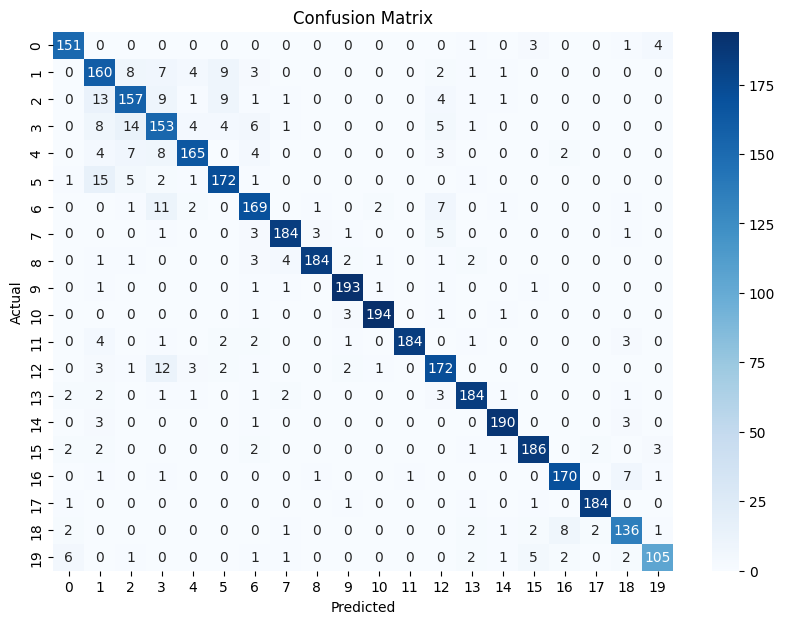

In [26]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Test text

In [27]:
# Function to predict new text
def predict_tfid_new_text(model, vectorizer, tfid, text):

    text_processed = preprocess_text(text) # Preprocess the text

    text_vectorized = vectorizer.transform([text_processed]) # Vectorize the text

    text_vectorized = tfid.transform(text_vectorized) # weight the Vectorized the text

    prediction = model.predict(text_vectorized) # Predict the category

    category_name = newsgroups.target_names[prediction[0]] # Get the category name

    return category_name

In [28]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church."
]

for text in test_texts:
    predicted_category = predict_tfid_new_text(model2, vect, vectorizer, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

Test Text: "NASA discovers new exoplanet in the habitable zone."
Predicted Category: "sci.space"

Test Text: "The car race yesterday was amazing."
Predicted Category: "rec.autos"

Test Text: "Python is a versatile programming language for data science."
Predicted Category: "sci.space"

Test Text: "Pope Francis is the Pope and head of the Catholic Church."
Predicted Category: "soc.religion.christian"



# Conclusion

Text classification is a powerful tool with numerous applications, and understanding the basics is essential for any data scientist or machine learning engineer. Compare to the TOP results https://paperswithcode.com/sota/text-classification-on-20news.

Summarize the news feed classification results.

In [29]:
print("Base line accuracy = ", scores_nb)
print("Vect-data classifier accuracy = ", scores_vect)
print("Vect-data LogisticRegression accuracy = ", scores_vect_LR)
print("TF-IDF-data classifier accuracy = ", scores_vect_tfid)

Base line accuracy =  0.8663129973474801
Vect-data classifier accuracy =  0.8543766578249337
Vect-data LogisticRegression accuracy =  0.8785145888594165
TF-IDF-data classifier accuracy =  0.9


# Next Steps

**Hyperparameter Tuning**: Experiment with different hyperparameters for the Logistic Regression model to improve performance. (May take 2-... h)

**Model Comparison:** Try other models like SVM, Random Forest, or even deep learning models like LSTM or BERT.

**Feature Engineering:** Experiment with different text preprocessing steps and feature extraction techniques.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{2,}', #accept tokens that have 2 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 3) # https://www.nlplanet.org/course-practical-nlp/01-intro-to-nlp/04-n-grams
                                    ),
                     svm.SVC(kernel='linear', C=1, max_iter=100))
param_grid = {'tfidfvectorizer__max_features': [None],
              #'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'svc__max_iter': [2000],
              'svc__C': [1],
              'svc__kernel': ['linear']


             }
grid = GridSearchCV(pipe, param_grid, cv=2)

grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)

print('\nBest params set : ', grid.best_params_)
print('\nBest score : ', grid.best_score_)
print('\nBest result: ', grid.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Best params set :  {'svc__C': 1, 'svc__kernel': 'linear', 'svc__max_iter': 2000, 'tfidfvectorizer__max_features': None}

Best score :  0.9021623772884054

Best result:  0.9323607427055703


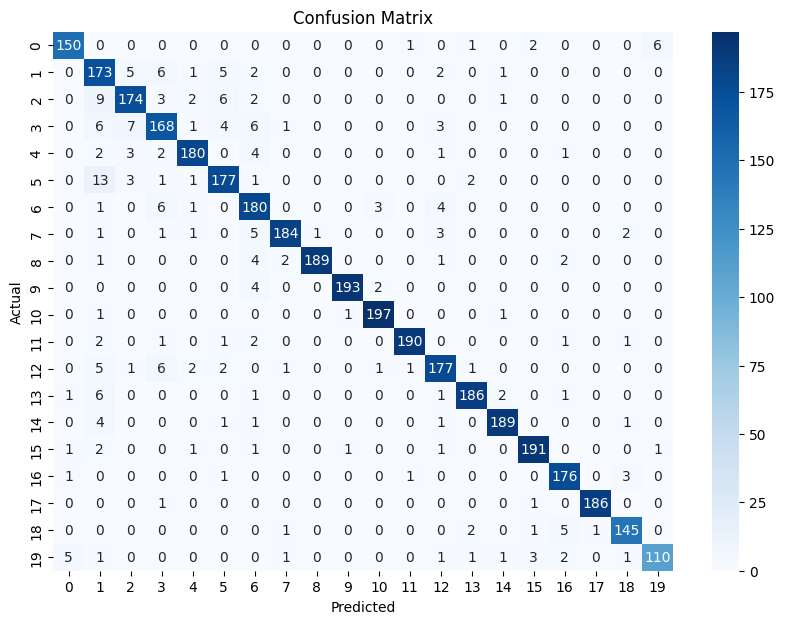

In [31]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church.",
    "But meanwhile: what makes you think you can pass a single string to a function that expects an array of strings in space. Astonout riding a pig on the moon? Nnca hokey play on finland ice ",
    "Dementia describes various symptoms of cognitive decline, like forgetfulness and difficulty communicating. Dementia is a symptom of several underlying conditions and brain disorders, including Alzheimer’s disease.",
    "AMD presented several benchmarks that obviously cast it in the best light. Still, some of the comparisons are pretty damning: In Forza Horizon 5, for example, AMD said it can achieve 135 frames per second at 1080p resolution, at Medium settings."
]

for text in test_texts:
    predicted_category = grid.predict([preprocess_text(text)])
    category_name = newsgroups.target_names[predicted_category[0]]
    print(f'Test Text: "{text}"\nPredicted Category: "{category_name}"\n')

Test Text: "NASA discovers new exoplanet in the habitable zone."
Predicted Category: "sci.space"

Test Text: "The car race yesterday was amazing."
Predicted Category: "rec.autos"

Test Text: "Python is a versatile programming language for data science."
Predicted Category: "comp.graphics"

Test Text: "Pope Francis is the Pope and head of the Catholic Church."
Predicted Category: "soc.religion.christian"

Test Text: "But meanwhile: what makes you think you can pass a single string to a function that expects an array of strings in space. Astonout riding a pig on the moon? Nnca hokey play on finland ice "
Predicted Category: "sci.space"

Test Text: "Dementia describes various symptoms of cognitive decline, like forgetfulness and difficulty communicating. Dementia is a symptom of several underlying conditions and brain disorders, including Alzheimer’s disease."
Predicted Category: "sci.med"

Test Text: "AMD presented several benchmarks that obviously cast it in the best light. Still, some 